In [1]:

# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images


/Users/jeevs/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


170500096/170498071 [==============================] - 290s 2us/step


/Users/jeevs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # This is added back by InteractiveShellApp.init_path()


<Figure size 640x480 with 9 Axes>

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jeevs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


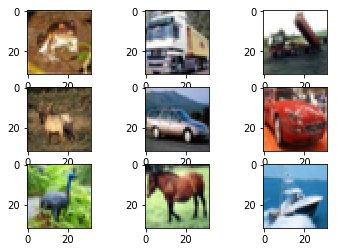

In [11]:
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

In [12]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [13]:

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [14]:

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [15]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]



In [17]:

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

In [18]:

	
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 202s 4ms/step - loss: 1.6934 - acc: 0.3854 - val_loss: 1.4061 - val_acc: 0.4970
Epoch 2/25
50000/50000 [==============================] - 234s 5ms/step - loss: 1.3293 - acc: 0.5219 - val_loss: 1.1908 - val_acc: 0.5834
Epoch 3/25
50000/50000 [==============================] - 206s 4ms/step - loss: 1.1531 - acc: 0.5890 - val_loss: 1.0857 - val_acc: 0.6161
Epoch 4/25
50000/50000 [==============================] - 205s 4ms/step - loss: 1.0234 - acc: 0.6377 - val_loss: 1.0212 - val_acc: 0.6369
Epoch 5/25
50000/50000 [==============================] - 206s 4ms/step - loss: 0.9176 - acc: 0.6765 - val_loss: 0.9611 - val_acc: 0.6619
Epoch 6/25
50000/50000 [==============================] - 203s 4ms/step - loss: 0.8333 - acc: 0.7057 - val_loss: 0.9307 - val_acc: 0.6739
Epoch 7/25
50000/50000 [==============================] - 220s 4ms/step - loss: 0.7562 - acc: 0.7332 - val_loss: 0.9173 - 

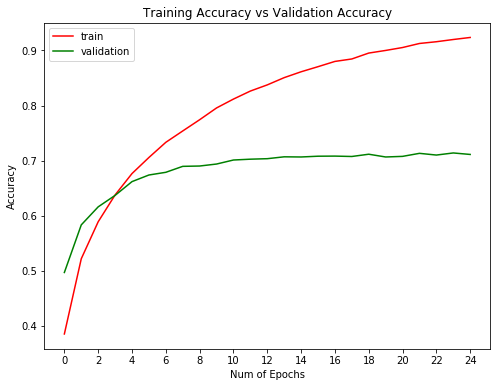

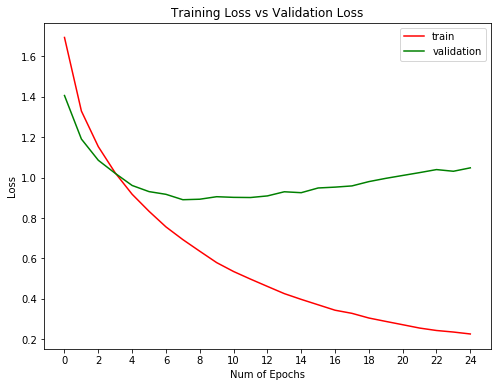

In [27]:
import numpy as np
cnn = model.history
plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 25, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 25, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

In [20]:
from keras_sequential_ascii import sequential_model_to_ascii_printout

In [21]:
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      3   32   32
              Conv2D    \|/  -------------------       896     0.0%
                relu   #####     32   32   32
             Dropout    | || -------------------         0     0.0%
                       #####     32   32   32
              Conv2D    \|/  -------------------      9248     0.2%
                relu   #####     32   32   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   16   16
             Flatten   ||||| -------------------         0     0.0%
                       #####        8192
               Dense   XXXXX -------------------   4194816    99.6%
                relu   #####         512
             Dropout    | || -------------------         0     0.0%
                       #####         512
               Dense   XXXXX -------------------      5130     0.1%
             softmax   ##### 

In [24]:

# Plots for training and testing process: loss and accuracy
cnn = model
plt.figure(0)
plt.plot( ['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

TypeError: 'History' object is not subscriptable

<Figure size 432x288 with 0 Axes>

In [23]:
sequential_model_to_ascii_printout(model2)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      3   32   32
              Conv2D    \|/  -------------------       896     0.0%
                relu   #####     32   32   32
             Dropout    | || -------------------         0     0.0%
                       #####     32   32   32
              Conv2D    \|/  -------------------      9248     0.3%
                relu   #####     32   32   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   16   16
              Conv2D    \|/  -------------------     18496     0.6%
                relu   #####     64   16   16
             Dropout    | || -------------------         0     0.0%
                       #####     64   16   16
              Conv2D    \|/  -------------------     36928     1.3%
                relu   #####     64   16   16
        MaxPooling2D   Y max -------------------         0     0.0%
              

In [28]:

	
# Create the model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 16, 16)        36928     
__________

In [30]:

	
numpy.random.seed(seed)
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 372s 7ms/step - loss: 1.9612 - acc: 0.2787 - val_loss: 1.7128 - val_acc: 0.3885
Epoch 2/5
50000/50000 [==============================] - 356s 7ms/step - loss: 1.5896 - acc: 0.4205 - val_loss: 1.4799 - val_acc: 0.4756
Epoch 3/5
50000/50000 [==============================] - 372s 7ms/step - loss: 1.4516 - acc: 0.4736 - val_loss: 1.3993 - val_acc: 0.5026
Epoch 4/5
50000/50000 [==============================] - 369s 7ms/step - loss: 1.3671 - acc: 0.5056 - val_loss: 1.3582 - val_acc: 0.5152
Epoch 5/5
50000/50000 [==============================] - 392s 8ms/step - loss: 1.3043 - acc: 0.5298 - val_loss: 1.3178 - val_acc: 0.5253
Accuracy: 71.34%
